In [8]:
import pandas as pd
from nemosis import static_table
from nemosis import defaults
from nemosis import dynamic_data_compiler

raw_data_cache = r'D:\NEM_cache'
file_name = "NEM_Region_duids.xlsx"

# Read the QLD1 sheet
df_qld = pd.read_excel(file_name, sheet_name="QLD1")

# Drop NaN values and convert to a list
natural_gas_qld = df_qld["Natural Gas DUID"].dropna().tolist()
coal_qld = df_qld["Coal DUID"].dropna().tolist()
solar_qld = df_qld["Solar DUID"].dropna().tolist()

In [9]:
table = 'DISPATCHLOAD'
start_time = '2023/01/01 00:10:00'
end_time = '2023/02/01 00:00:00'
load_data = dynamic_data_compiler(start_time, end_time, table, raw_data_cache)

INFO: Compiling data for table DISPATCHLOAD
INFO: Returning DISPATCHLOAD.


In [10]:
gen = static_table('Generators and Scheduled Loads', raw_data_cache)

INFO: Retrieving static table Generators and Scheduled Loads


In [11]:
import pandas as pd
import plotly.express as px

# Combine DUID lists for filtering
duids_list = coal_qld + natural_gas_qld

# Filter the load_data dataframe
filtered_df = load_data[load_data['DUID'].isin(duids_list)]

# Calculate 'actual' based on the formula
filtered_df['actual'] = filtered_df['RAMPUPRATE'] - ((filtered_df['TOTALCLEARED'].diff() / 5) * 60)

grouped_df = filtered_df.groupby('SETTLEMENTDATE')['actual'].sum().reset_index()

# Create a plotly line plot for sum of 'actual' vs 'settlement time'
fig = px.line(grouped_df, x='SETTLEMENTDATE', y='actual', title='Sum of Actual MW vs Settlement Time',
              labels={'settlement time': 'SETTLEMENTDATE', 'actual': 'Total Actual MW'})

# Show the plot
fig.show()


C:\Users\deven\AppData\Local\Temp\ipykernel_23920\1629181556.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
table = 'DISPATCHREGIONSUM'
demand_data = dynamic_data_compiler(start_time, end_time, table, raw_data_cache)

INFO: Compiling data for table DISPATCHREGIONSUM
INFO: Returning DISPATCHREGIONSUM.


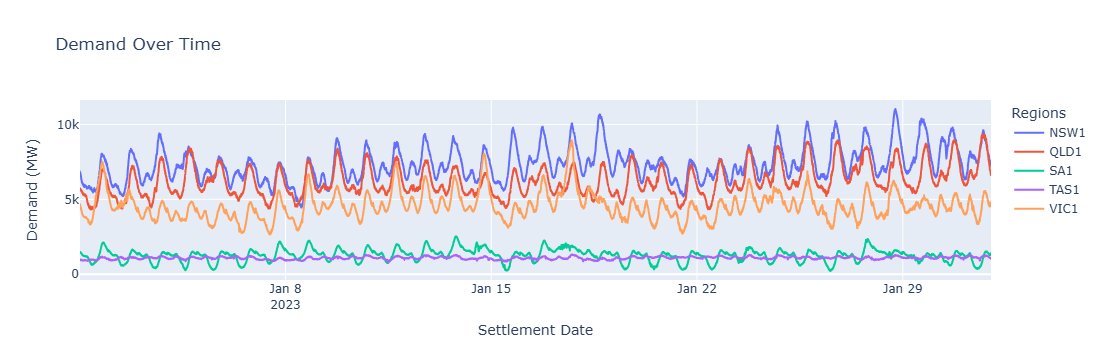

In [13]:
fig = px.line(
    demand_data, 
    x='SETTLEMENTDATE', 
    y='TOTALDEMAND', 
    color='REGIONID',
    title='Demand Over Time',
    labels={
        'SETTLEMENTDATE': 'Settlement Date',
        'TOTALDEMAND': 'Demand (MW)',
        'REGIONID': 'Regions'
    }
)
fig.show()

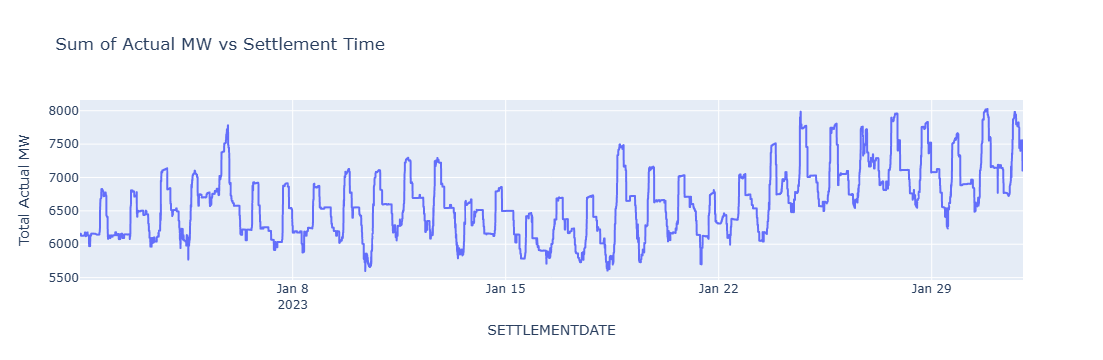

In [14]:
import pandas as pd
import plotly.express as px

# Combine DUID lists for filtering
duids_list = coal_qld + natural_gas_qld

# Filter the load_data dataframe
filtered_df = load_data[load_data['DUID'].isin(duids_list)]

grouped_df = filtered_df.groupby('SETTLEMENTDATE')['AVAILABILITY'].sum().reset_index()

# Create a plotly line plot for sum of 'actual' vs 'settlement time'
fig = px.line(grouped_df, x='SETTLEMENTDATE', y='AVAILABILITY', title='Sum of Actual MW vs Settlement Time',
              labels={'settlement time': 'SETTLEMENTDATE', 'AVAILABILITY': 'Total Actual MW'})

# Show the plot
fig.show()


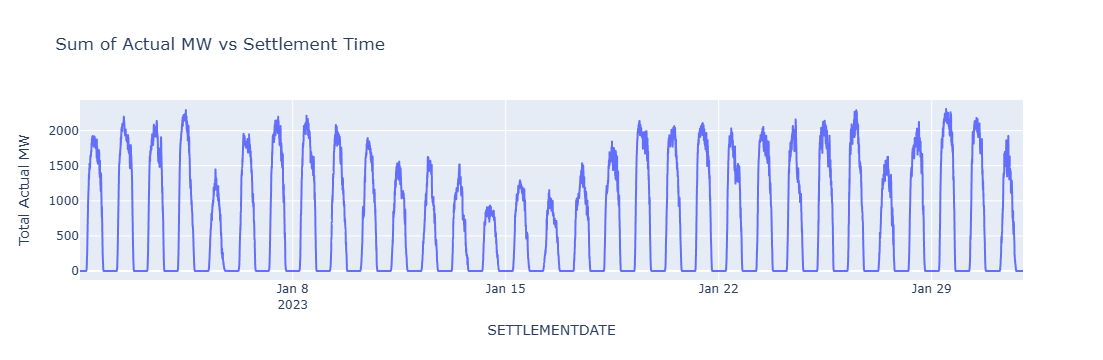

In [16]:
import pandas as pd
import plotly.express as px

# Combine DUID lists for filtering
duids_list = solar_qld

# Filter the load_data dataframe
filtered_df = load_data[load_data['DUID'].isin(duids_list)]

grouped_df = filtered_df.groupby('SETTLEMENTDATE')['AVAILABILITY'].sum().reset_index()

# Create a plotly line plot for sum of 'actual' vs 'settlement time'
fig = px.line(grouped_df, x='SETTLEMENTDATE', y='AVAILABILITY', title='Sum of Actual MW vs Settlement Time',
              labels={'settlement time': 'SETTLEMENTDATE', 'AVAILABILITY': 'Total Actual MW'})

# Show the plot
fig.show()


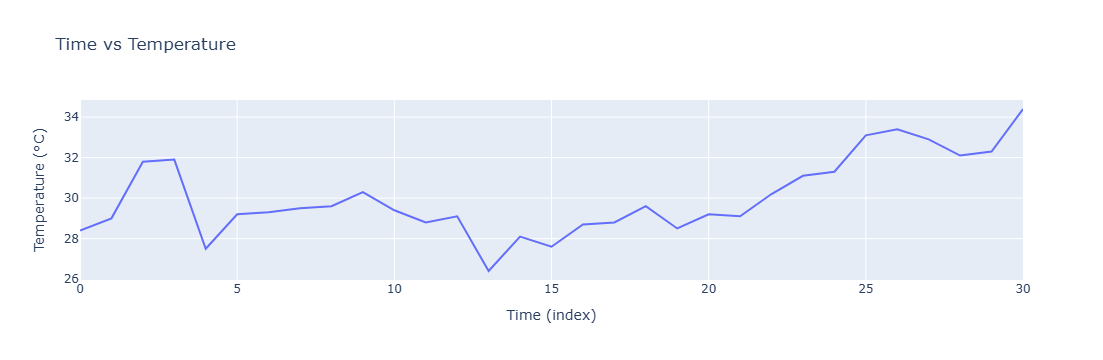

In [19]:
import pandas as pd
import plotly.express as px

# List of temperature values
temperatures = [
    28.4, 29.0, 31.8, 31.9, 27.5, 29.2, 29.3, 29.5, 29.6, 30.3,
    29.4, 28.8, 29.1, 26.4, 28.1, 27.6, 28.7, 28.8, 29.6, 28.5,
    29.2, 29.1, 30.2, 31.1, 31.3, 33.1, 33.4, 32.9, 32.1, 32.3, 34.4
]

# Create DataFrame with a simple time index
df = pd.DataFrame({
    'Time': range(len(temperatures)),
    'Temperature': temperatures
})

# Plot
fig = px.line(df, x='Time', y='Temperature',
              title='Time vs Temperature',
              labels={'Time': 'Time (index)', 'Temperature': 'Temperature (°C)'})
fig.show()


C:\Users\deven\AppData\Local\Temp\ipykernel_23920\3179169848.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



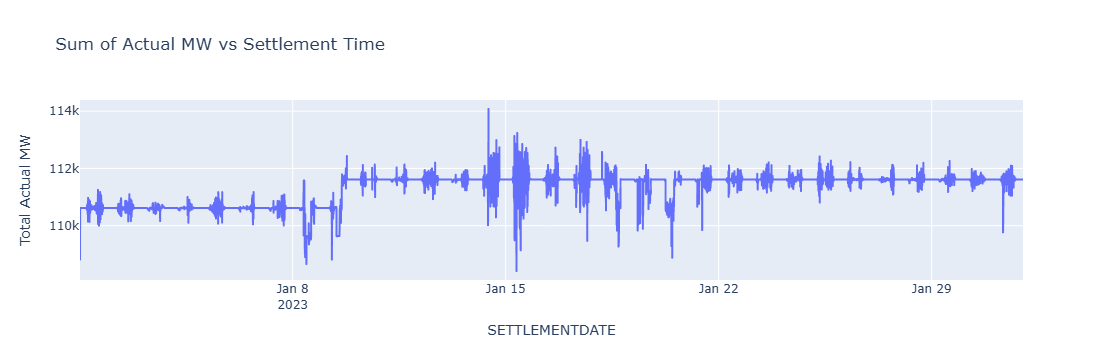

In [20]:
import pandas as pd
import plotly.express as px

# Combine DUID lists for filtering
duids_list = solar_qld

# Filter the load_data dataframe
filtered_df = load_data[load_data['DUID'].isin(duids_list)]

# Calculate 'actual' based on the formula
filtered_df['actual'] = filtered_df['RAMPUPRATE'] - ((filtered_df['TOTALCLEARED'].diff() / 5) * 60)

grouped_df = filtered_df.groupby('SETTLEMENTDATE')['actual'].sum().reset_index()

# Create a plotly line plot for sum of 'actual' vs 'settlement time'
fig = px.line(grouped_df, x='SETTLEMENTDATE', y='actual', title='Sum of Actual MW vs Settlement Time',
              labels={'settlement time': 'SETTLEMENTDATE', 'actual': 'Total Actual MW'})

# Show the plot
fig.show()
